<video width="1000" height=" " playbackspeed=0.5 src="attention.mp4" controls></video>

In [2]:
# 首先定义3个1×4的input。 pytorch代码如下：

import torch
x = [
    [1, 0, 1, 0],  # input 1
    [0, 2, 0, 2],  # input 2
    [1, 1, 1, 1]   # input 3
    ]
x = torch.tensor(x, dtype=torch.float32)

In [3]:
# 定义Q K V权重矩阵

w_key = [
  [0, 0, 1],
  [1, 1, 0],
  [0, 1, 0],
  [1, 1, 0]
]  
w_query = [
  [1, 0, 1],
  [1, 0, 0],
  [0, 0, 1],
  [0, 1, 1]
]
w_value = [
  [0, 2, 0],
  [0, 3, 0],
  [1, 0, 3],
  [1, 1, 0]
]
w_key = torch.tensor(w_key, dtype=torch.float32)
w_query = torch.tensor(w_query, dtype=torch.float32)
w_value = torch.tensor(w_value, dtype=torch.float32)

print("Weights for key: \n", w_key)
print("Weights for query: \n", w_query)
print("Weights for value: \n", w_value)

Weights for key: 
 tensor([[0., 0., 1.],
        [1., 1., 0.],
        [0., 1., 0.],
        [1., 1., 0.]])
Weights for query: 
 tensor([[1., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 1.]])
Weights for value: 
 tensor([[0., 2., 0.],
        [0., 3., 0.],
        [1., 0., 3.],
        [1., 1., 0.]])


In [5]:
# 获得 q k v向量

keys = x @ w_key
querys = x @ w_query
values = x @ w_value

print("Keys: \n", keys)
print("Querys: \n", querys)
print("Values: \n", values)

Keys: 
 tensor([[0., 1., 1.],
        [4., 4., 0.],
        [2., 3., 1.]])
Querys: 
 tensor([[1., 0., 2.],
        [2., 2., 2.],
        [2., 1., 3.]])
Values: 
 tensor([[1., 2., 3.],
        [2., 8., 0.],
        [2., 6., 3.]])


In [10]:
# 通过内积计算注意力分数
# 并用softmax进下归一化
from torch.nn.functional import softmax

attn_scores = querys @ keys.T
print(attn_scores)

attn_scores_softmax = softmax(attn_scores, dim=-1)
print(torch.round(attn_scores_softmax, decimals=1))

tensor([[ 2.,  4.,  4.],
        [ 4., 16., 12.],
        [ 4., 12., 10.]])
tensor([[0.1000, 0.5000, 0.5000],
        [0.0000, 1.0000, 0.0000],
        [0.0000, 0.9000, 0.1000]])


In [12]:
# 计算输出

weighted_values = values[:,None] * attn_scores_softmax.T[:,:,None]
print(weighted_values)

outputs = weighted_values.sum(dim=0)
print(outputs)

tensor([[[6.3379e-02, 1.2676e-01, 1.9014e-01],
         [6.0337e-06, 1.2067e-05, 1.8101e-05],
         [2.9539e-04, 5.9077e-04, 8.8616e-04]],

        [[9.3662e-01, 3.7465e+00, 0.0000e+00],
         [1.9640e+00, 7.8561e+00, 0.0000e+00],
         [1.7611e+00, 7.0443e+00, 0.0000e+00]],

        [[9.3662e-01, 2.8099e+00, 1.4049e+00],
         [3.5972e-02, 1.0792e-01, 5.3958e-02],
         [2.3834e-01, 7.1501e-01, 3.5750e-01]]])
tensor([[1.9366, 6.6831, 1.5951],
        [2.0000, 7.9640, 0.0540],
        [1.9997, 7.7599, 0.3584]])


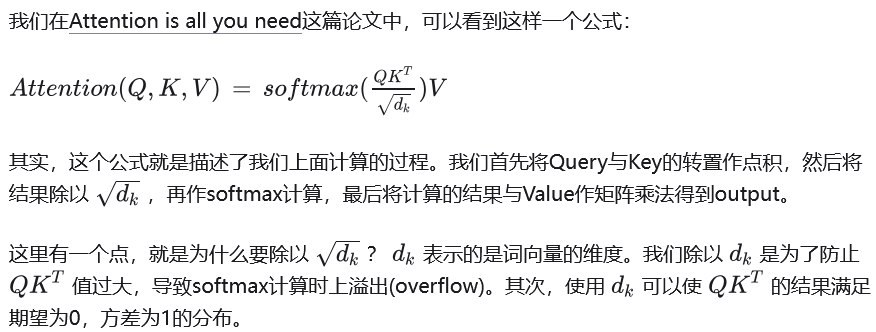

## 上述计算过程即 Scaled Dot-Product Attention

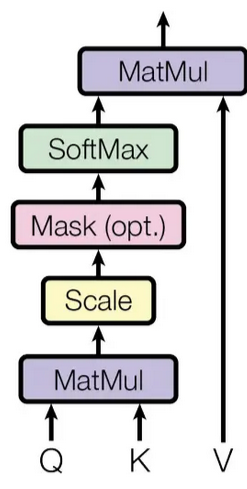

## Multi-head attention 

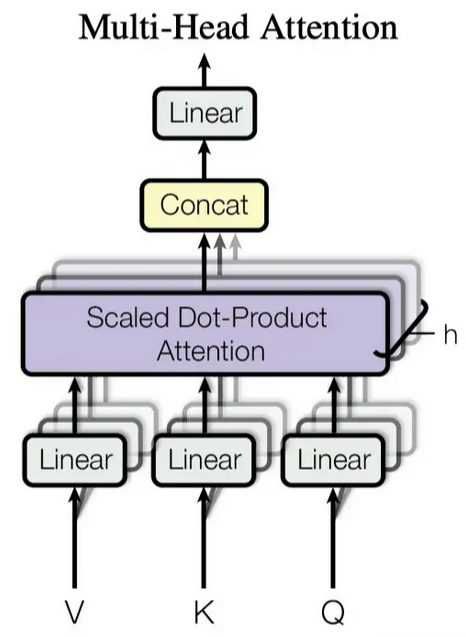

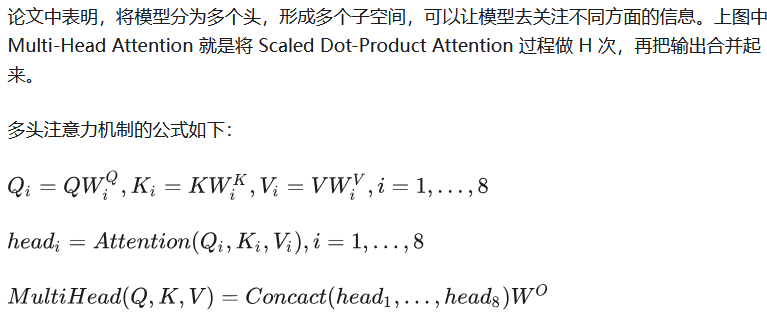

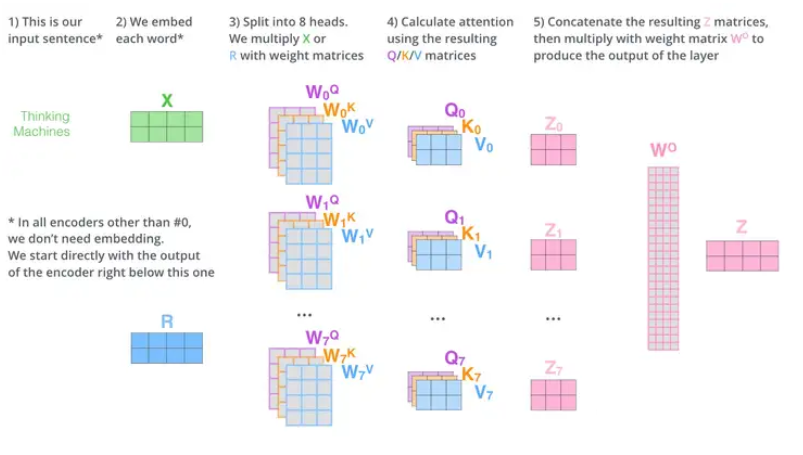